# Analisi tra i picchi delle variazioni positive e negative degli NFT e la sentimental analysis

## Import libraries and dataframes

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# ANALISI PER CAPIRE QUALE NFT è IDENTIFICATA DA QUEL TOKEN

In [55]:
# Caricamento dei dataset
top_nft_positivi = pd.read_csv("../dataframes/top_10_positivi_df.csv")
top_nft_negativi = pd.read_csv("../dataframes/top_10_negativi_df.csv")
tweets_sentiment = pd.read_csv("../dataframes/tweets_sentiment_df.csv")
tweets_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")

In [73]:
# Selezione delle top 5 NFT positive e delle top 2 NFT negative
top_5_pos = top_nft_positivi.head(5)
top_2_neg = top_nft_negativi.head(2)

# Convertire le colonne di date in datetime
top_5_pos['data_inizio'] = pd.to_datetime(top_5_pos['data_inizio'])
top_2_neg['data_inizio'] = pd.to_datetime(top_2_neg['data_inizio'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

# Funzione per filtrare i tweet per sentimento e data
def filter_tweets(nft_df, sentiment_df, sentiment, days):
    result = {}
    for index, row in nft_df.iterrows():
        nft_date = row['data_inizio']
        date_limit = nft_date - pd.Timedelta(days=days)
        filtered_tweets = sentiment_df[
            (sentiment_df['created_at'] <= date_limit) &
            (sentiment_df['Sentiment'] == sentiment)
        ]
        result[f'Picco {index + 1}'] = filtered_tweets
    return result

# Filtraggio dei tweet positivi e negativi considerando ogni picco individualmente
positive_tweets_dict = filter_tweets(top_5_pos, tweets_sentiment, 'Positive', 0) # Due settimane prima di ogni picco
negative_tweets_dict = filter_tweets(top_2_neg, tweets_sentiment, 'Negative', 0) # Giorni prima di ogni picco

print(top_5_pos['data_inizio'])
print(top_2_neg['data_inizio'])

threshold_pos = 1 # Le ho scelte a caso andando a tentativi
threshold_neg = 0.5 # Le ho scelte a caso andando a tentativi

# Funzione per filtrare i tweet con punteggio totale superiore alla soglia
def filter_by_threshold(tweets_dict, threshold):
    filtered_tweets_dict = {}
    for key, tweets in tweets_dict.items():
        filtered_tweets = tweets[tweets['punteggio_totale'] >= threshold]
        filtered_tweets_dict[key] = filtered_tweets
    return filtered_tweets_dict

# Filtraggio dei tweet con punteggio totale superiore alla soglia
filtered_positive_tweets_dict = filter_by_threshold(positive_tweets_dict, threshold_pos)
filtered_negative_tweets_dict = filter_by_threshold(negative_tweets_dict, threshold_neg)

# Stampa dei risultati
def print_filtered_tweets(tweets_dict, sentiment):
    for key, tweets in tweets_dict.items():
        print(f"I tweet che hanno influito sul {key} ({sentiment}) il giorno sono:")
        print(tweets[['created_at', 'tweet_id', 'content', 'punteggio_totale']])
        print("\n")

# Richiamo della funzione per stampare i tweet filtrati positivi
print("Tweet positivi influenzanti per ciascun picco:")
print_filtered_tweets(filtered_positive_tweets_dict, "positivo")

# Richiamo della funzione per stampare i tweet filtrati negativi
print("Tweet negativi influenzanti per ciascun picco:")
print_filtered_tweets(filtered_negative_tweets_dict, "negativo")

/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_1991/1437972241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_pos['data_inizio'] = pd.to_datetime(top_5_pos['data_inizio'])
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_1991/1437972241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_neg['data_inizio'] = pd.to_datetime(top_2_neg['data_inizio'])


0   2021-08-15 07:05:16
1   2021-11-05 09:46:35
2   2021-02-25 14:23:29
3   2021-05-30 18:06:57
4   2021-08-25 04:45:19
Name: data_inizio, dtype: datetime64[ns]
0   2021-10-27 23:46:06
1   2021-12-01 20:23:47
Name: data_inizio, dtype: datetime64[ns]
Tweet positivi influenzanti per ciascun picco:
I tweet che hanno influito sul Picco 1 (positivo) il giorno sono:
               created_at             tweet_id  \
58131 2021-02-01 17:49:22  1356298610929926144   

                                                 content  punteggio_totale  
58131  favorite yoongi pics poorly drawn doodles : lo...          1.036564  


I tweet che hanno influito sul Picco 2 (positivo) il giorno sono:
                 created_at             tweet_id  \
58131   2021-02-01 17:49:22  1356298610929926144   
696982  2021-08-23 10:00:00  1429745230023208969   
922202  2021-09-26 14:21:01  1442132102888280070   
1124036 2021-10-26 02:15:34  1452821173813661696   
1170515 2021-10-31 10:28:42  1454757214598615043   

 

In [67]:
# Funzione per ottenere le collezioni dei tweet filtrati
def get_collections(tweets_df, collection_df):
    return tweets_df.merge(collection_df, on='tweet_id', how='left')[['tweet_id', 'collection', 'created_at' 'author_id', 'retweet_count', 'like_count', 'reply_count', 'quote_count', 'punteggio_totale', 'polarity', 'subjectivity', 'Sentiment']]

# Aggiunta delle collezioni ai tweet filtrati
def add_collections(tweets_dict, collection_df):
    collections_dict = {}
    for key, tweets in tweets_dict.items():
        tweets_with_collections = get_collections(tweets, collection_df)
        collections_dict[key] = tweets_with_collections
    return collections_dict

# Aggiunta delle collezioni ai tweet filtrati positivi e negativi
filtered_positive_tweets_with_collections = add_collections(filtered_positive_tweets_dict, tweets_collection)
filtered_negative_tweets_with_collections = add_collections(filtered_negative_tweets_dict, tweets_collection)

# Stampa dei risultati
def print_filtered_tweets_with_collections(tweets_dict, sentiment):
    for key, tweets in tweets_dict.items():
        print(f"I tweet che hanno influito sul {key} ({sentiment}) sono:")
        print(tweets)
        print("\n")

print("Tweet Positivi che potrebbero aver influito sulla variazione del prezzo delle top 5 NFT positive (con punteggio totale superiore alla soglia):")
print_filtered_tweets_with_collections(filtered_positive_tweets_with_collections, 'positivo')

print("Tweet Negativi che potrebbero aver influito sulla variazione del prezzo delle top 2 NFT negative (con punteggio totale superiore alla soglia):")
print_filtered_tweets_with_collections(filtered_negative_tweets_with_collections, 'negativo')

Tweet Positivi che potrebbero aver influito sulla variazione del prezzo delle top 5 NFT positive (con punteggio totale superiore alla soglia):
I tweet che hanno influito sul Picco 1 (positivo) sono:
              tweet_id collection            author_id  retweet_count  \
0  1356298610929926144    doodles  1308036352605171713          15356   

   like_count  reply_count  quote_count  punteggio_totale  polarity  \
0       68551          250          417          1.036564  0.033333   

   subjectivity Sentiment  
0      0.633333  Positive  


I tweet che hanno influito sul Picco 2 (positivo) sono:
              tweet_id         collection            author_id  retweet_count  \
0  1356298610929926144            doodles  1308036352605171713          15356   
1  1429745230023208969        cryptopunks            309285803           9039   
2  1442132102888280070  boredapeyachtclub             14642331            151   
3  1452821173813661696            doodles  1405701429646430212           

merge dei tweet più influenti

In [68]:
def concatenate_tweets_dict(tweets_dict):
    # Crea una lista di DataFrame dai valori del dizionario
    return pd.concat(list(tweets_dict.values()), ignore_index=True)

# Concatenazione dei dataframes di tweet positivi e negativi
concatenated_positive_tweets = concatenate_tweets_dict(filtered_positive_tweets_with_collections)
concatenated_negative_tweets = concatenate_tweets_dict(filtered_negative_tweets_with_collections)

# Unione dei dataframes concatenati in un unico dataframe
all_filtered_tweets_with_collections = pd.concat(
    [concatenated_positive_tweets, concatenated_negative_tweets],
    ignore_index=True
)

# Esportazione dei dataframes concatenati in un file CSV
all_filtered_tweets_with_collections.to_csv('../dataframes/filtered_tweets_with_collections.csv', index=False)

# GRAFO

In [ ]:
# Concatenate positive and negative filtered tweets for combined graph
all_filtered_tweets = pd.concat([tweet for tweet in filtered_positive_tweets_dict.values()] + [tweet for tweet in filtered_negative_tweets_dict.values()])

# Add a 'Sentiment' column to differentiate between positive and negative tweets
all_filtered_tweets['Sentiment'] = all_filtered_tweets['Sentiment'].replace({'Positive': 'Positivo', 'Negative': 'Negativo'})

# Separate positive and negative tweets for plotting
filtered_positive_tweets = all_filtered_tweets[all_filtered_tweets['Sentiment'] == 'Positivo']
filtered_negative_tweets = all_filtered_tweets[all_filtered_tweets['Sentiment'] == 'Negativo']

# Rimuovi i duplicati 
filtered_positive_tweets = filtered_positive_tweets.drop_duplicates()
filtered_negative_tweets = filtered_negative_tweets.drop_duplicates()

print(filtered_negative_tweets)

# Plot the combined graph
plt.figure(figsize=(12, 6))
plt.scatter(filtered_positive_tweets['created_at'], filtered_positive_tweets['punteggio_totale'], color='green', label='Positivo', alpha=0.6)
plt.scatter(filtered_negative_tweets['created_at'], filtered_negative_tweets['punteggio_totale'], color='red', label='Negativo', alpha=0.6)
plt.xlabel('Data di Creazione')
plt.ylabel('Punteggio Totale')
plt.title('Tweet che potrebbero aver influito sulla variazione del prezzo delle NFT')
plt.legend()
plt.grid(True)

# Annotate the nodes with tweet_id and author_id
for idx, row in all_filtered_tweets.iterrows():
    label = f"{row['tweet_id']}, {row['author_id']}"
    plt.annotate(label, (row['created_at'], row['punteggio_totale']), fontsize=8, alpha=0.75, textcoords="offset points", xytext=(5,5), ha='center')

plt.show()


In [13]:
# Stampa gli attributi del dataframe top_nft_positivi
#print("Attributi del dataframe 'top_10_positivi':")
#print(top_10_positivi.info())

In [14]:
# Stampa gli attributi del dataframe top_nft_negativi
#print("\nAttributi del dataframe 'top_10_negativi':")
#print(top_10_negativi.info())

In [15]:
# Stampa gli attributi del dataframe tweets_sentiment
#print("\nAttributi del dataframe 'tweets_sentiment':")
#print(tweets_sentiment.info())

# Analisi dei 10 NFT NEGATIVI DA QUI IN POI è QUELLO DELLA MARTINA

## Definizione della funzione e preparazione dei dati

Abbiamo esaminato solo i 3 giorni antecedenti alla data di inizio della variazione fino alla data di fine per ogni token

In [17]:
# Funzione per filtrare i tweet nei periodi specificati e calcolare la distribuzione del sentiment
def get_daily_sentiment(data_inizio, data_fine, period_days=3):
    data_inizio = pd.to_datetime(data_inizio)  # Convertire data_inizio in datetime
    data_fine = pd.to_datetime(data_fine)      # Convertire data_fine in datetime
    period_start = data_inizio - pd.Timedelta(days=period_days)
    period_end = data_fine
    tweets_period = tweets_sentiment[(tweets_sentiment['created_at'] >= period_start) &
                                     (tweets_sentiment['created_at'] <= period_end)]
    
    # Raggruppare per giorno e calcolare la distribuzione del sentiment
    tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
    daily_sentiment = tweets_period.groupby(['day', 'Sentiment']).size().unstack(fill_value=0)
    daily_sentiment = daily_sentiment.apply(lambda x: x / x.sum(), axis=1)
    return daily_sentiment

# Applicare la funzione a ciascun record
daily_sentiment_list = []
for idx, row in top_2_neg.iterrows():
    token_id = row['token_id']
    data_inizio = row['data_inizio']
    data_fine = row['data_fine']
    daily_sentiment = get_daily_sentiment(data_inizio, data_fine)
    daily_sentiment['token_id'] = token_id
    daily_sentiment_list.append(daily_sentiment)

# Concatenare i risultati in un unico DataFrame
daily_sentiment_df = pd.concat(daily_sentiment_list).reset_index()

/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_47439/67620792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_47439/67620792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')


## Creazione di grafici a linee per ciascun token

ConversionError: Failed to convert value(s) to axis units: '2021-10-27 23:46:06'

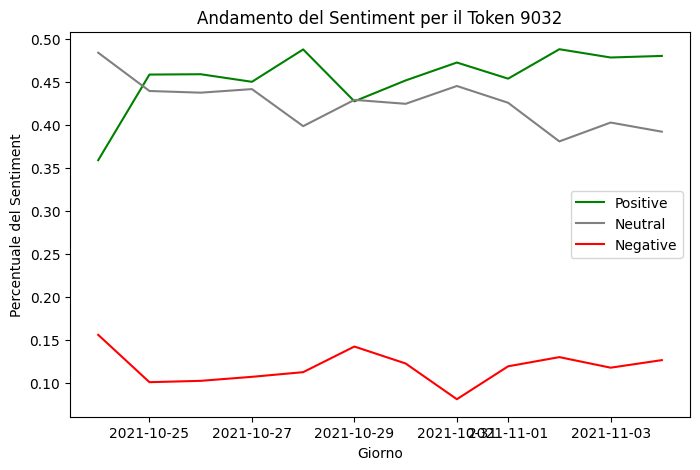

In [18]:
# Creare i grafici a linee per ciascun token
for token_id in top_2_neg['token_id']:
    token_sentiment_df = daily_sentiment_df[daily_sentiment_df['token_id'] == token_id]
    data_inizio = top_2_neg[top_2_neg['token_id'] == token_id]['data_inizio'].values[0]
    data_fine = top_2_neg[top_2_neg['token_id'] == token_id]['data_fine'].values[0]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=token_sentiment_df, x='day', y='Positive', label='Positive', color='green')
    sns.lineplot(data=token_sentiment_df, x='day', y='Neutral', label='Neutral', color='grey')
    sns.lineplot(data=token_sentiment_df, x='day', y='Negative', label='Negative', color='red')
    plt.title(f'Andamento del Sentiment per il Token {token_id}')
    plt.xlabel('Giorno')
    plt.ylabel('Percentuale del Sentiment')
    
    # Annotazioni per le date di inizio e fine variazione
    plt.axvline(data_inizio, color='blue', linestyle='--', label='Data inizio variazione')
    plt.axvline(data_fine, color='purple', linestyle='--', label='Data fine variazione')
    
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    
    plt.show()

# Analisi dei 10 NFT POSITIVI

## Definizione della funzione e preparazione dei dati

Abbiamo esaminato solo i 3 giorni antecedenti alla data di inizio della variazione fino alla data di fine per ogni token

In [19]:
# Applicare la funzione a ciascun record
daily_sentiment_list = []
for idx, row in top_5_pos.iterrows():
    token_id = row['token_id']
    data_inizio = row['data_inizio']
    data_fine = row['data_fine']
    daily_sentiment = get_daily_sentiment(data_inizio, data_fine)
    daily_sentiment['token_id'] = token_id
    daily_sentiment_list.append(daily_sentiment)

# Concatenare i risultati in un unico DataFrame
daily_sentiment_df = pd.concat(daily_sentiment_list).reset_index()


/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_47439/67620792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_47439/67620792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_47439/67620792.py:11: SettingWithCopyWarning: 
A value is trying to b

## Creazione di grafici a linee per ciascun token

ConversionError: Failed to convert value(s) to axis units: '2021-08-15 07:05:16'

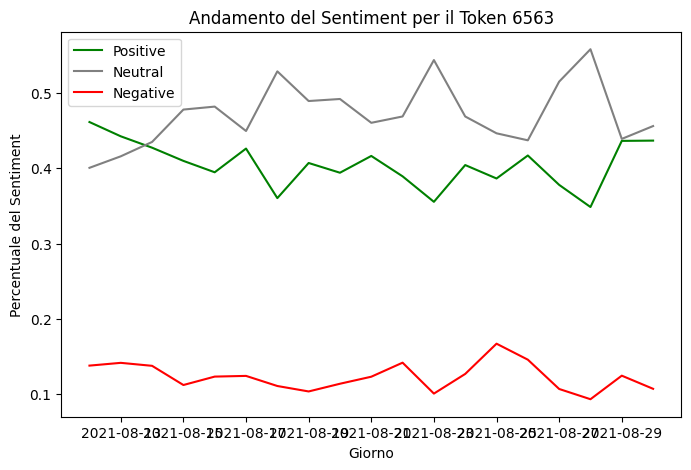

In [20]:
# Creare i grafici a linee per ciascun token
for token_id in top_5_pos['token_id']:
    token_sentiment_df = daily_sentiment_df[daily_sentiment_df['token_id'] == token_id]
    data_inizio = top_5_pos[top_5_pos['token_id'] == token_id]['data_inizio'].values[0]
    data_fine = top_5_pos[top_5_pos['token_id'] == token_id]['data_fine'].values[0]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=token_sentiment_df, x='day', y='Positive', label='Positive', color='green')
    sns.lineplot(data=token_sentiment_df, x='day', y='Neutral', label='Neutral', color='grey')
    sns.lineplot(data=token_sentiment_df, x='day', y='Negative', label='Negative', color='red')
    plt.title(f'Andamento del Sentiment per il Token {token_id}')
    plt.xlabel('Giorno')
    plt.ylabel('Percentuale del Sentiment')
    
    # Annotazioni per le date di inizio e fine variazione
    plt.axvline(data_inizio, color='blue', linestyle='--', label='Data inizio variazione')
    plt.axvline(data_fine, color='purple', linestyle='--', label='Data fine variazione')
    
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    
    plt.show()
